In [10]:
import pandas as pd
import numpy as np
import geoplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

%matplotlib inline

In [11]:
df = pd.read_csv('Global_Landslide_Catalog_Export.csv')
df.shape

(9564, 34)

In [12]:
df.head()

,id,date,time,country,nearest_places,hazard_type,landslide_type,trigger,storm_name,fatalities,...,population,countrycode,continentcode,key,version,tstamp,changeset_id,latitude,longitude,geolocation
0,1,01/02/2007,NaN,United Kingdom,"Whitehaven, Cumbria",landslide,Landslide,Rain,NaN,1.0,...,24803.0,GB,EU,sGaiIKdcW,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,54.549400,-3.587500,"(54.549399999999999, -3.5874999999999999)"
1,2,01/03/2007,NaN,Peru,"Alto Mesapata, in the Pasco province",landslide,Complex,Rain,NaN,NaN,...,0.0,PE,SA,S95OsumK4,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,-10.383800,-75.426700,"(-10.383800000000001, -75.426699999999997)"
2,3,01/05/2007,NaN,Brazil,"Nova Friburgo, Rio de Janeiro",landslide,Landslide,Rain,NaN,7.0,...,153361.0,BR,SA,D5vlNdgB7,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,-22.282346,-42.536362,"(-22.282346350000001, -42.536362050000001)"
3,4,01/05/2007,NaN,Brazil,"Sumidouro, Rio de Janeiro",landslide,Landslide,Rain,NaN,2.0,...,11555.0,BR,SA,h5J8IFdc4,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,-22.045200,-42.673400,"(-22.045200000000001, -42.673400000000001)"
4,5,01/05/2007,NaN,Brazil,"Jundiai, Sao Paulo",landslide,Landslide,Rain,NaN,1.0,...,54415.0,BR,SA,s5Zb5FdB4,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,-23.231100,-46.613600,"(-23.231100000000001, -46.613599999999998)"


In [13]:
def get_date(date):
    try:
        new_date = datetime.datetime.strptime(date, "%d/%M/%Y").timestamp()
        return new_date
    except:
        return 'Unknown'
    
def get_year(date):
    try:
        new_date = datetime.datetime.strptime(date, "%d/%M/%Y").year
        return new_date
    except:
        return 'Unknown'

df = df.rename(index=str, columns={"latitude": "lat", "longitude": "lon"})
df['fatalities'] = df['fatalities'].fillna(0)
df = df.fillna("Unknown")
df['year'] = df['date'].apply(lambda x: get_year(x))
df['timestamp'] = df['date'].apply(lambda x: get_date(x))

df.head(5)

,id,date,time,country,nearest_places,hazard_type,landslide_type,trigger,storm_name,fatalities,...,continentcode,key,version,tstamp,changeset_id,lat,lon,geolocation,year,timestamp
0,1,01/02/2007,Unknown,United Kingdom,"Whitehaven, Cumbria",landslide,Landslide,Rain,Unknown,1.0,...,EU,sGaiIKdcW,1,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1,54.549400,-3.587500,"(54.549399999999999, -3.5874999999999999)",2007,1.16761e+09
1,2,01/03/2007,Unknown,Peru,"Alto Mesapata, in the Pasco province",landslide,Complex,Rain,Unknown,0.0,...,SA,S95OsumK4,1,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1,-10.383800,-75.426700,"(-10.383800000000001, -75.426699999999997)",2007,1.16761e+09
2,3,01/05/2007,Unknown,Brazil,"Nova Friburgo, Rio de Janeiro",landslide,Landslide,Rain,Unknown,7.0,...,SA,D5vlNdgB7,1,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1,-22.282346,-42.536362,"(-22.282346350000001, -42.536362050000001)",2007,1.16761e+09
3,4,01/05/2007,Unknown,Brazil,"Sumidouro, Rio de Janeiro",landslide,Landslide,Rain,Unknown,2.0,...,SA,h5J8IFdc4,1,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1,-22.045200,-42.673400,"(-22.045200000000001, -42.673400000000001)",2007,1.16761e+09
4,5,01/05/2007,Unknown,Brazil,"Jundiai, Sao Paulo",landslide,Landslide,Rain,Unknown,1.0,...,SA,s5Zb5FdB4,1,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1,-23.231100,-46.613600,"(-23.231100000000001, -46.613599999999998)",2007,1.16761e+09


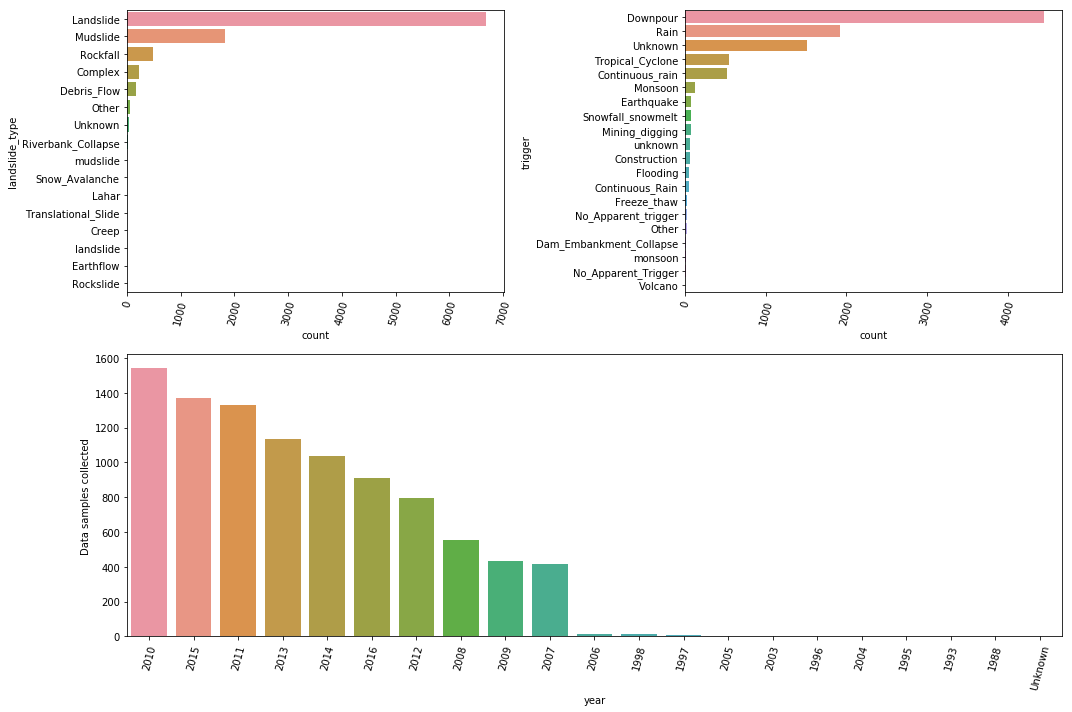

In [14]:
plt.figure(1, figsize=(15,10))
plt.subplot(221)
g = sns.countplot(y = df['landslide_type'],  order = df['landslide_type'].value_counts().index)
plt.xticks(rotation=75) 


plt.subplot(222)
g2 = sns.countplot(y = df['trigger'], order = df['trigger'].value_counts().index)
plt.xticks(rotation=75) 

plt.subplot(212)
g2 = sns.countplot(df['year'], order = df['year'].value_counts().index)
plt.xticks(rotation=75) 
plt.ylabel("Data samples collected")
plt.tight_layout()
plt.show()


# Density of measures made

In [15]:
coords = geoplotlib.utils.DataAccessObject(df[['lat','lon']])
geoplotlib.kde(coords, bw = [0.5,0.5], cut_below=1e-1)
geoplotlib.show()

('smallest non-zero count', 6.962478188799075e-08)
('max count:', 41.08282286377863)


# Data collected over time

In [16]:
dated_landslides = df[df['year']!='Unknown'].sort_values(by = 'timestamp')

In [37]:
from geoplotlib.layers import BaseLayer
from geoplotlib.core import BatchPainter, UiManager
from geoplotlib.colors import colorbrewer, ColorMap, create_set_cmap

cmap = create_set_cmap(dated_landslides['year'],'plasma')

class TimeLayer(BaseLayer):
    
    def __init__(self, data, start_timestamp, steps, point_size = 3.5):
        self.data = data
        self.steps = steps
        self.point_size = point_size
        self.t = start_timestamp # 2006 timestamp
        self.painter = BatchPainter()
        self.UiManager = UiManager()
        self.i = 0
        
        
    def draw(self, proj, mouse_x, mouse_y, ui_manager):
        
        current_data = self.data.iloc[self.i]
        self.x, self.y = proj.lonlat_to_screen(current_data['lon'], current_data['lat'])
             
        self.painter.points(self.x, self.y, self.point_size)
        self.painter.set_color(cmap[current_data['year']])
        self.painter.batch_draw()
        self.i+=1
        
        ui_manager.info("Date :{}".format(self.data['date'][self.i]))




geoplotlib.add_layer(TimeLayer(dated_landslides, start_timestamp = 1137073600, steps = 1))
geoplotlib.show()

Traceback (most recent call last):
  File "C:\Users\antoi\Anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 2477, in get_value
    tz=getattr(series.dtype, 'tz', None))
  File "pandas\_libs\index.pyx", line 98, in pandas._libs.index.IndexEngine.get_value
  File "pandas\_libs\index.pyx", line 106, in pandas._libs.index.IndexEngine.get_value
  File "pandas\_libs\index.pyx", line 154, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 1210, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 1218, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 9563

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\antoi\Anaconda3\lib\site-packages\geoplotlib\__init__.py", line 32, in _runapp
    app.start()
  File "C:\Users\antoi\Anaconda3\lib\site-packages\geoplotlib\core.py", line 369, in start
    pygle